## **Conditional Workflow**
### **Quardratic Equation Workflow**
- 2 Roots
- Discriminant: b**2 - 4*a*c
- D > 0 : 2 Distinct Real Roots
- D = 0 : 2 Same Real Roots
- D < 0 : Imageneary Roots / Not Real Roots

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ---------------- STATE ---------------- #

class QuadState(TypedDict):
    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    result: str
    plot: bool


In [3]:
# ---------------- FUNCTIONS ---------------- #

def show_equation(state: QuadState):
    a, b, c = state["a"], state["b"], state["c"]

    b_sign = "+" if b >= 0 else "-"
    c_sign = "+" if c >= 0 else "-"

    equation = f"{a}x² {b_sign} {abs(b)}x {c_sign} {abs(c)} = 0"
    return {"equation": equation}


def calculate_discriminant(state: QuadState):
    discriminant = state["b"] ** 2 - 4 * state["a"] * state["c"]
    return {"discriminant": discriminant}


def real_roots(state: QuadState):
    d = state["discriminant"]
    a = state["a"]
    b = state["b"]

    root1 = round((-b + math.sqrt(d)) / (2 * a), 2)
    root2 = round((-b - math.sqrt(d)) / (2 * a), 2)

    result = f"The equation has two distinct real roots: {root1} and {root2}"
    return {"result": result}


def repeated_roots(state: QuadState):
    a = state["a"]
    b = state["b"]

    root = round(-b / (2 * a), 2)
    result = f"The equation has one repeated real root: {root}"
    return {"result": result}


def imaginary_roots(state: QuadState):
    a = state["a"]
    b = state["b"]
    d = state["discriminant"]

    real_part = round(-b / (2 * a), 2)
    imaginary_part = round(math.sqrt(abs(d)) / (2 * a), 2)

    result = (
        "The equation has two complex roots: "
        f"{real_part} + {imaginary_part}i and "
        f"{real_part} - {imaginary_part}i"
    )
    return {"result": result}


def plot_equation(state: QuadState):
    if not state["plot"]:
        return {}

    a, b, c = state["a"], state["b"], state["c"]

    x = np.linspace(-20, 20, 800)
    y = a * x**2 + b * x + c

    plt.figure(figsize=(8, 4))
    plt.plot(x, y, color="r")
    plt.axhline(0)
    plt.axvline(0)
    plt.grid(True)
    plt.title(f"Graph of {state['equation']}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    return {}


def check_condition(state: QuadState) -> Literal["real_roots", "repeated_roots", "imaginary_roots"]:
    if state["discriminant"] > 0:
        return "real_roots"
    elif state["discriminant"] == 0:
        return "repeated_roots"
    else:
        return "imaginary_roots"


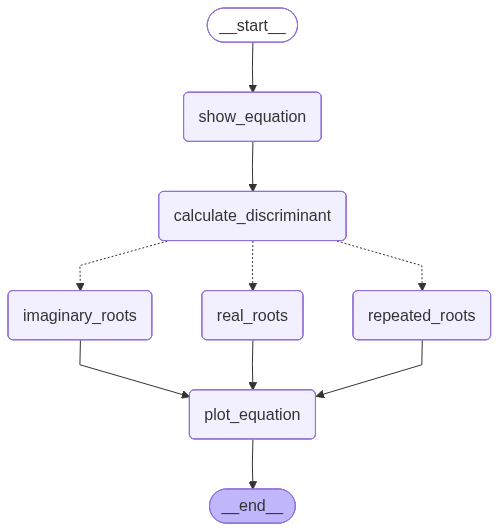

In [4]:
# ---------------- GRAPH ---------------- #

graph = StateGraph(QuadState)

# Nodes
graph.add_node("show_equation", show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("real_roots", real_roots)
graph.add_node("repeated_roots", repeated_roots)
graph.add_node("imaginary_roots", imaginary_roots)
graph.add_node("plot_equation", plot_equation)

# Edges
graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")

graph.add_conditional_edges("calculate_discriminant", check_condition)

graph.add_edge("real_roots", "plot_equation")
graph.add_edge("repeated_roots", "plot_equation")
graph.add_edge("imaginary_roots", "plot_equation")

graph.add_edge("plot_equation", END)

workflow = graph.compile()
workflow

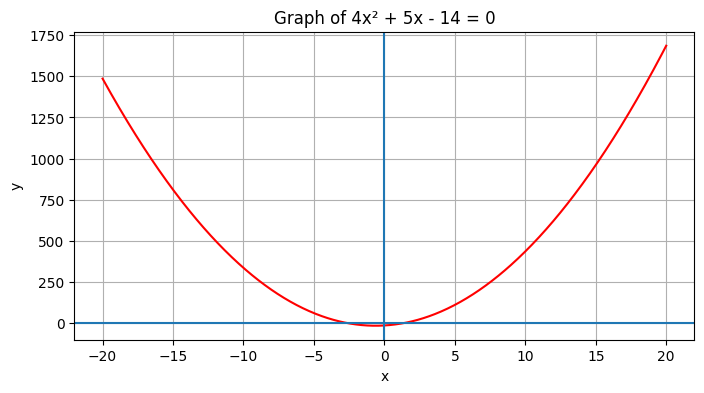

{'a': 4, 'b': 5, 'c': -14, 'equation': '4x² + 5x - 14 = 0', 'discriminant': 249, 'result': 'The equation has two distinct real roots: 1.35 and -2.6', 'plot': True}


In [5]:
# ---------------- RUN ---------------- #

initial_state = {
    "a": 4,
    "b": 5,
    "c": -14,
    'plot': True
}

response = workflow.invoke(initial_state)
print(response)

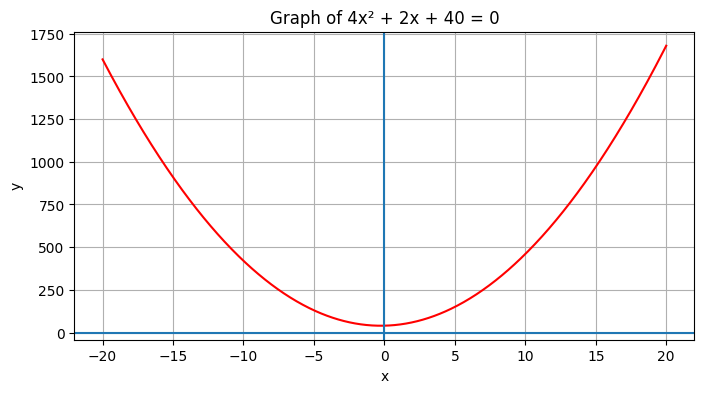

{'a': 4, 'b': 2, 'c': 40, 'equation': '4x² + 2x + 40 = 0', 'discriminant': -636, 'result': 'The equation has two complex roots: -0.25 + 3.15i and -0.25 - 3.15i', 'plot': True}


In [6]:
# ---------------- RUN ---------------- #

initial_state = {
    "a": 4,
    "b": 2,
    "c": 40,
    'plot': True
}

response = workflow.invoke(initial_state)
print(response)

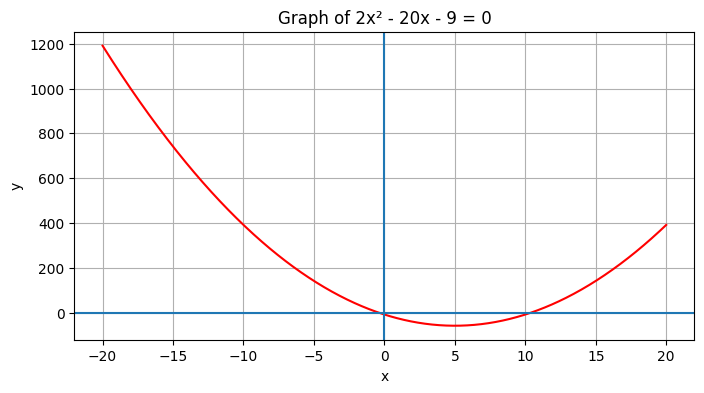

{'a': 2, 'b': -20, 'c': -9, 'equation': '2x² - 20x - 9 = 0', 'discriminant': 472, 'result': 'The equation has two distinct real roots: 10.43 and -0.43', 'plot': True}


In [7]:
# ---------------- RUN ---------------- #

initial_state = {
    "a": 2,
    "b": -20,
    "c": -9,
    'plot': True
}

response = workflow.invoke(initial_state)
print(response)